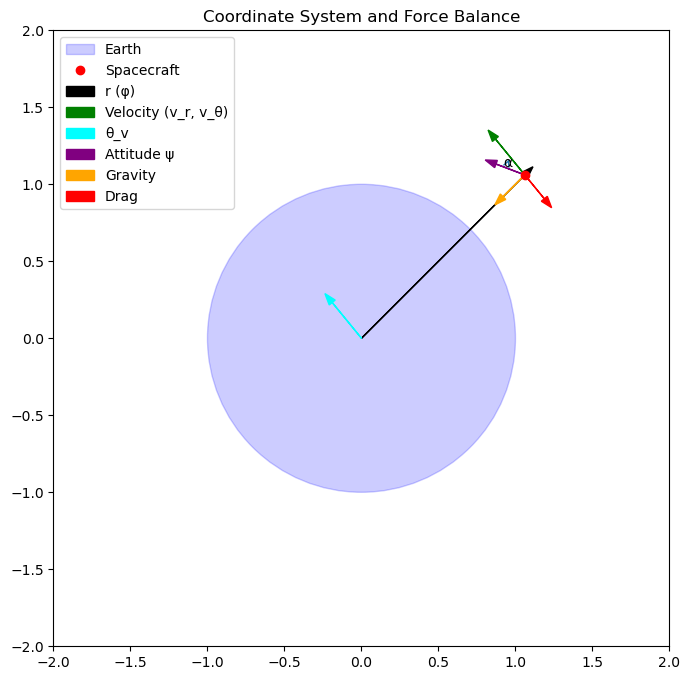

In [2]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Earth
earth = plt.Circle((0, 0), 1, color='blue', alpha=0.2, label='Earth')
ax.add_patch(earth)

# Spacecraft position (r=1.5, φ=π/4 for example)
phi = np.pi / 4
r = 1.5
x, y = r * np.cos(phi), r * np.sin(phi)
ax.plot(x, y, 'ro', label='Spacecraft')

# Radius vector
ax.arrow(0, 0, x, y, head_width=0.05, color='black', label='r (φ)')

# Velocity (v_r=0.1, v_θ=1.0)
v_r, v_theta = 0.1, 1.0
v_x = v_r * np.cos(phi) - v_theta * np.sin(phi)
v_y = v_r * np.sin(phi) + v_theta * np.cos(phi)
ax.arrow(x, y, 0.3 * v_x, 0.3 * v_y, head_width=0.05, color='green', label='Velocity (v_r, v_θ)')

# θ_v
theta_v = np.arctan2(v_y, v_x)
ax.arrow(0, 0, 0.3 * np.cos(theta_v), 0.3 * np.sin(theta_v), head_width=0.05, color='cyan', label='θ_v')

# Attitude ψ (example: aligned with θ_v + α)
alpha = np.pi / 6  # 30° for illustration
psi = theta_v + alpha
ax.arrow(x, y, 0.2 * np.cos(psi), 0.2 * np.sin(psi), head_width=0.05, color='purple', label='Attitude ψ')


# Gravity
grav_len = 0.2
grav_dir_x, grav_dir_y = -x / r, -y / r
ax.arrow(x, y, grav_len * grav_dir_x, grav_len * grav_dir_y, head_width=0.05, color='orange', label='Gravity')

# Drag (opposite velocity)
drag_len = 0.2
drag_dir_x, drag_dir_y = -v_x / np.sqrt(v_x**2 + v_y**2), -v_y / np.sqrt(v_x**2 + v_y**2)
ax.arrow(x, y, drag_len * drag_dir_x, drag_len * drag_dir_y, head_width=0.05, color='red', label='Drag')


# α arc (approximate)
ax.annotate('α', xy=(x + 0.15 * np.cos(theta_v), y + 0.15 * np.sin(theta_v)),
            xytext=(x + 0.15 * np.cos(psi), y + 0.15 * np.sin(psi)),
            arrowprops=dict(arrowstyle='->', color='tab:blue'))

ax.legend()
ax.set_title('Coordinate System and Force Balance')
plt.show()